## Tree Methods Focus 

### GOAL: Create a model to predict whether or not a customer will Churn .

In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [464]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [465]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [467]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [ ]:
# Exploratory Data Analysis

In [468]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

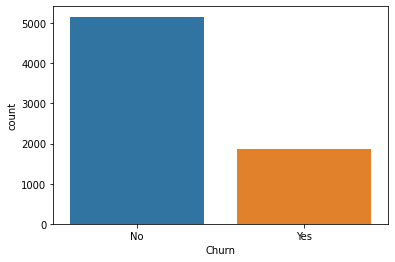

In [469]:
# Countplot to display the balance of the class labels (Churn)
sns.countplot(data = df, x = 'Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

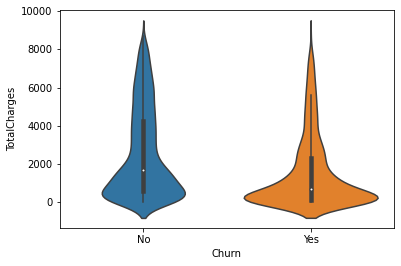

In [470]:
# distrbution of TotalCharges between Churn categories with a Violin Plot
sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

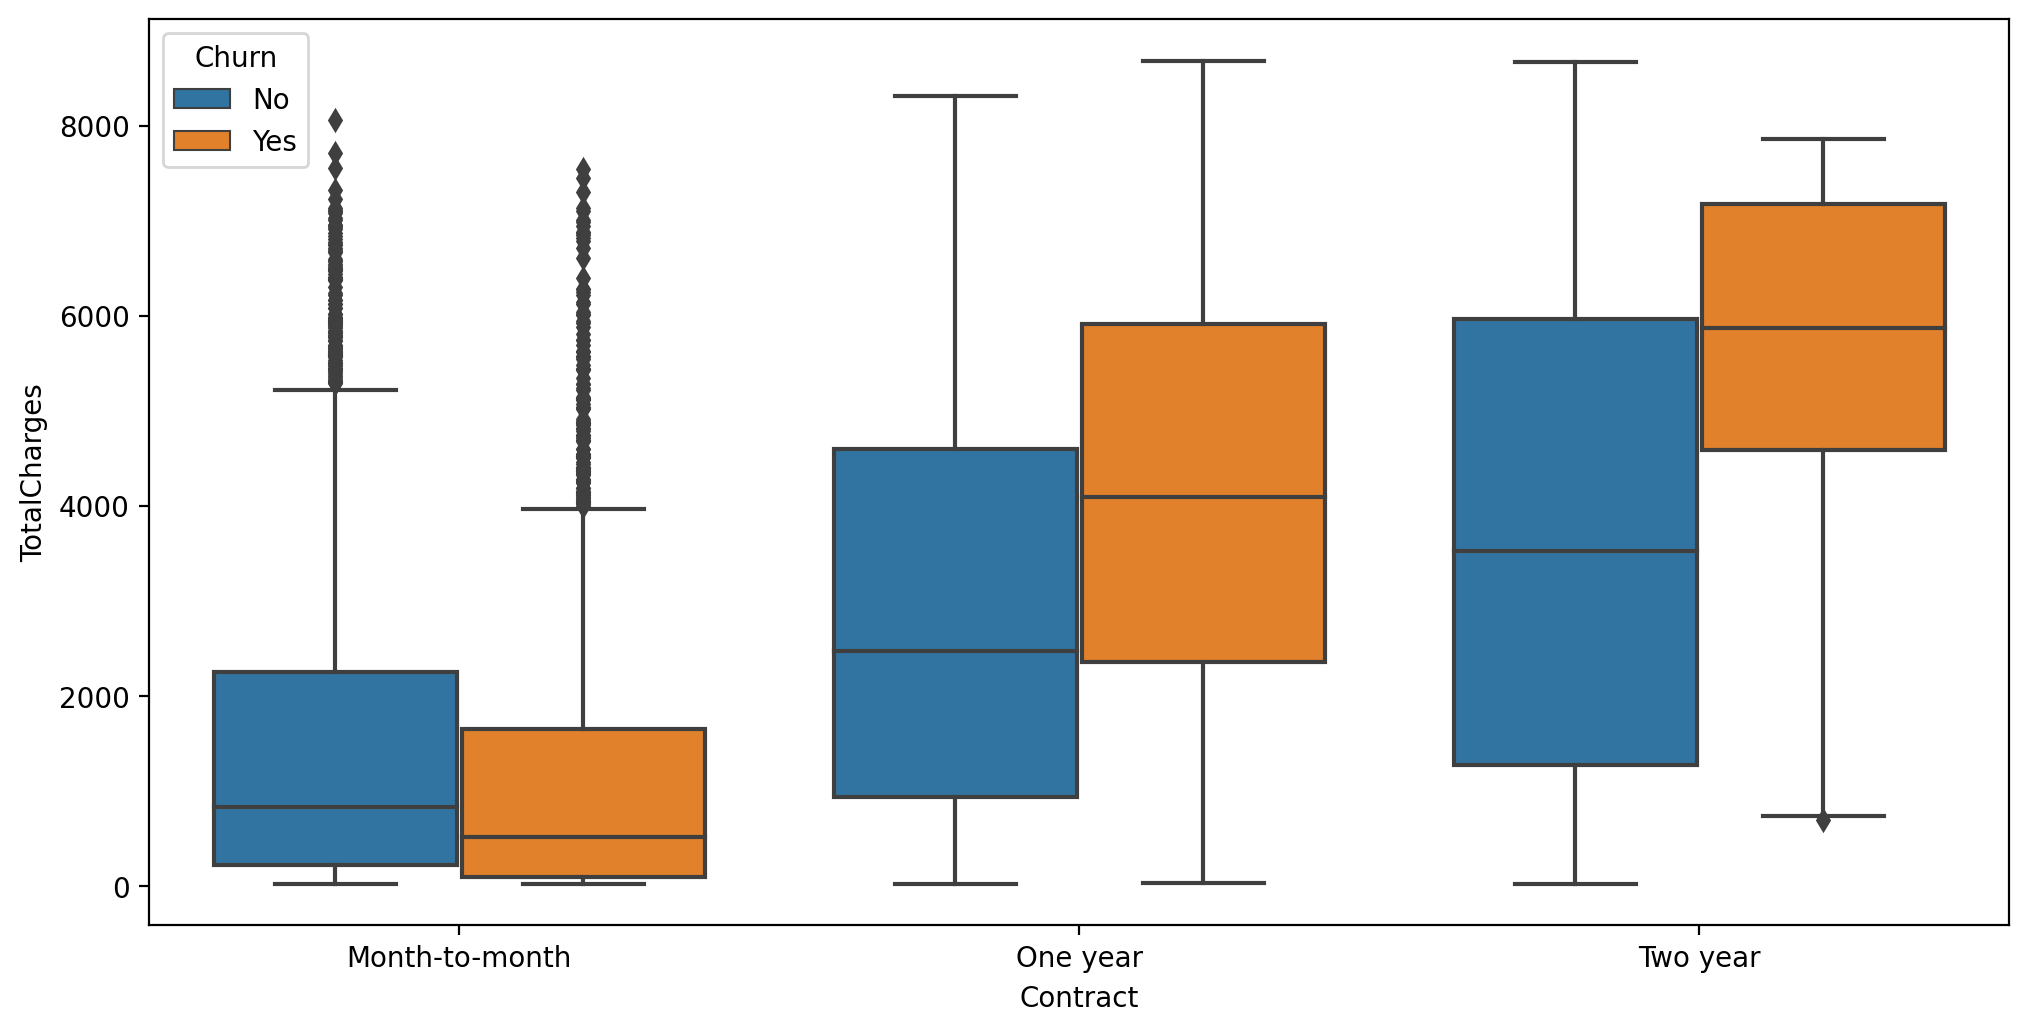

In [471]:
# boxplot showing the distribution of TotalCharges per Contract type
plt.figure(figsize = (12,6), dpi = 200)
sns.boxplot(data = df, x = 'Contract', y = 'TotalCharges', hue = 'Churn')

In [ ]:
# Barplot showing the correlation of the following features to the class label

In [472]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [473]:
corr_df = pd.get_dummies(data = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']])
corr_df

SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0                 0              1            0           0            1   
1                 0              0            1           1            0   
2                 0              0            1           1            0   
3                 0              0            1           1            0   
4                 0              1            0           1            0   
...             ...            ...          ...         ...          ...   
7027              0              0            1           0            1   
7028              0              1            0           0            1   
7029              0              1            0           0            1   
7030              1              0            1           0            1   
7031              0              0            1           1            0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0                 1               0                1                 0   
1                 1               0                0                 1   
2                 1               0                0                 1   
3                 1               0                1                 0   
4                 1               0                0                 1   
...             ...             ...              ...               ...   
7027              0               1                0                 1   
7028              0               1                0                 1   
7029              0               1                1                 0   
7030              1               0                0                 1   
7031              1               0                0                 1   

      MultipleLines_No  ...  Contract_One year  Contract_Two year  \
0                    0  ...                  0                  0   
1                    1  ...                  1                  0   
2                    1  ...                  0                  0   
3                    0  ...                  1                  0   
4                    1  ...                  0                  0   
...                ...  ...                ...                ...   
7027                 0  ...                  1                  0   
7028                 0  ...                  1                  0   
7029                 0  ...                  0                  0   
7030                 0  ...                  0                  0   
7031                 1  ...                  0                  1   

      PaperlessBilling_No  PaperlessBilling_Yes  \
0                       0                     1   
1                       1                     0   
2                       0                     1   
3                       1                     0   
4                       0                     1   
...                   ...                   ...   
7027                    0                     1   
7028                    0                     1   
7029                    0                     1   
7030                    0                     1   
7031                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7027                                        0   
7028                                        0   
7029                                        0   
7030                                        0   
7031                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1              

In [474]:
sort_corr_series = corr_df.corr()['Churn_Yes'].sort_values()[1:-1]
sort_corr_series

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

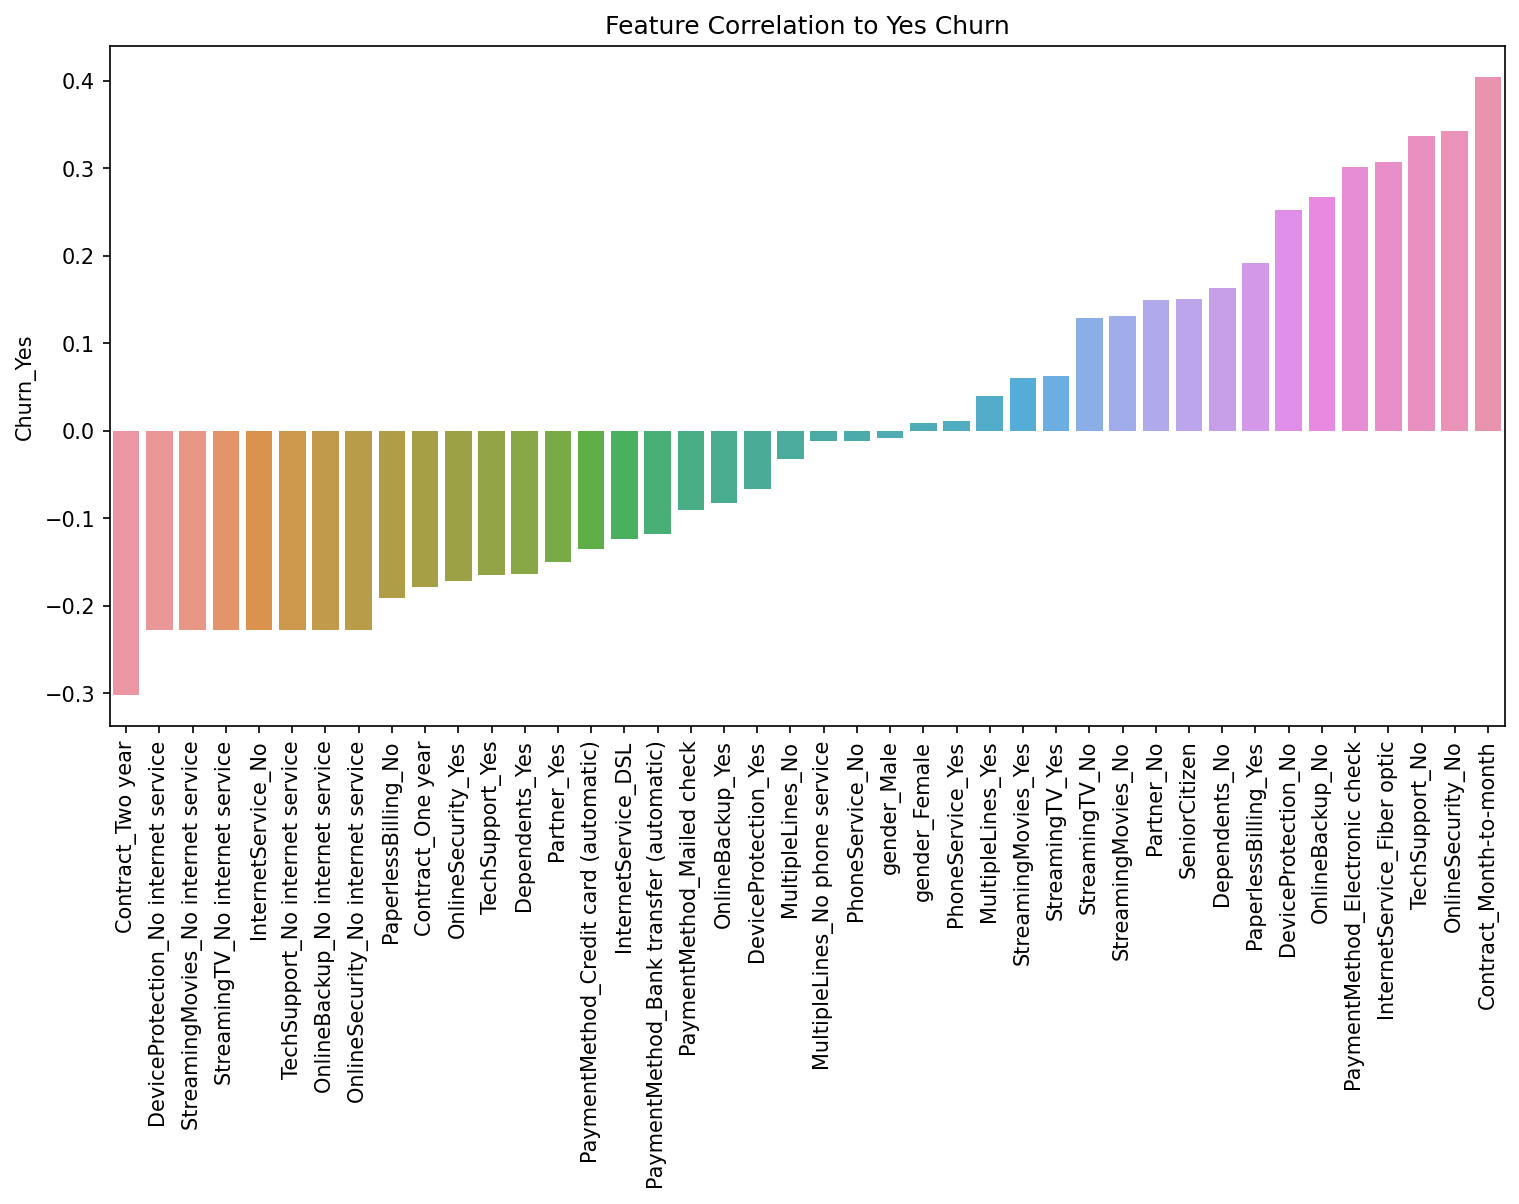

In [475]:
plt.figure(figsize = (12,6), dpi = 150)
sns.barplot(x = sort_corr_series.index, y = sort_corr_series)
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation = 90);

In [ ]:
# Churn Analysis

In [476]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [477]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

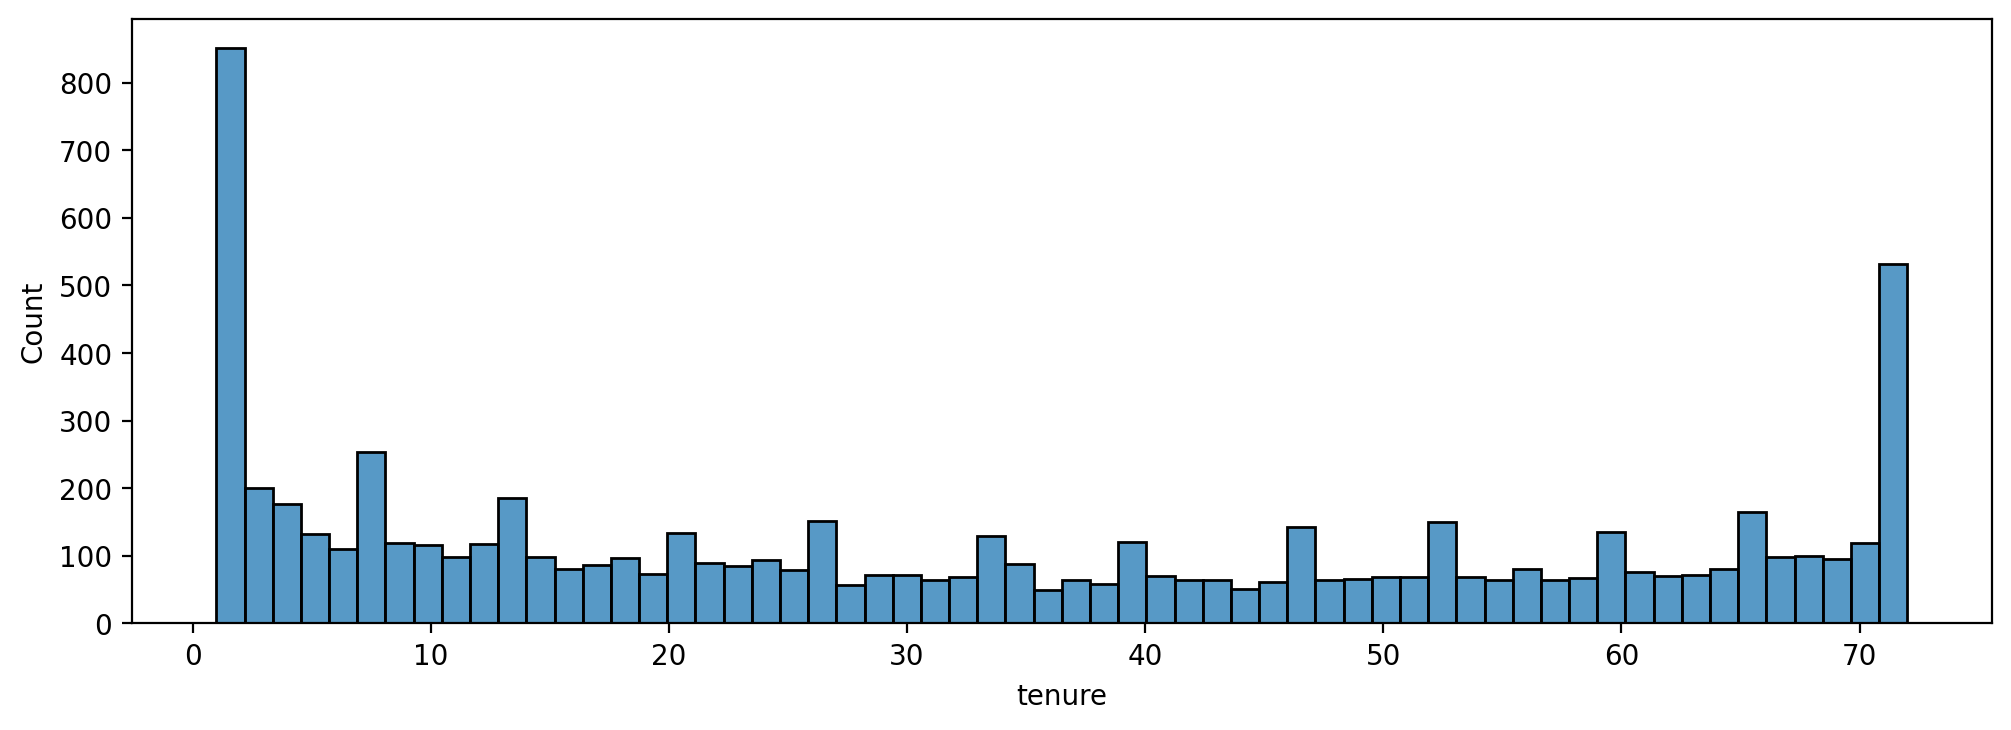

In [478]:
# histogram displaying the distribution of 'tenure' column (amount of months a customer was or has been on a customer)
plt.figure(figsize = (12, 4), dpi = 200)
sns.histplot(data = df, x = 'tenure', bins = 60)

<Figure size 2400x800 with 0 Axes>

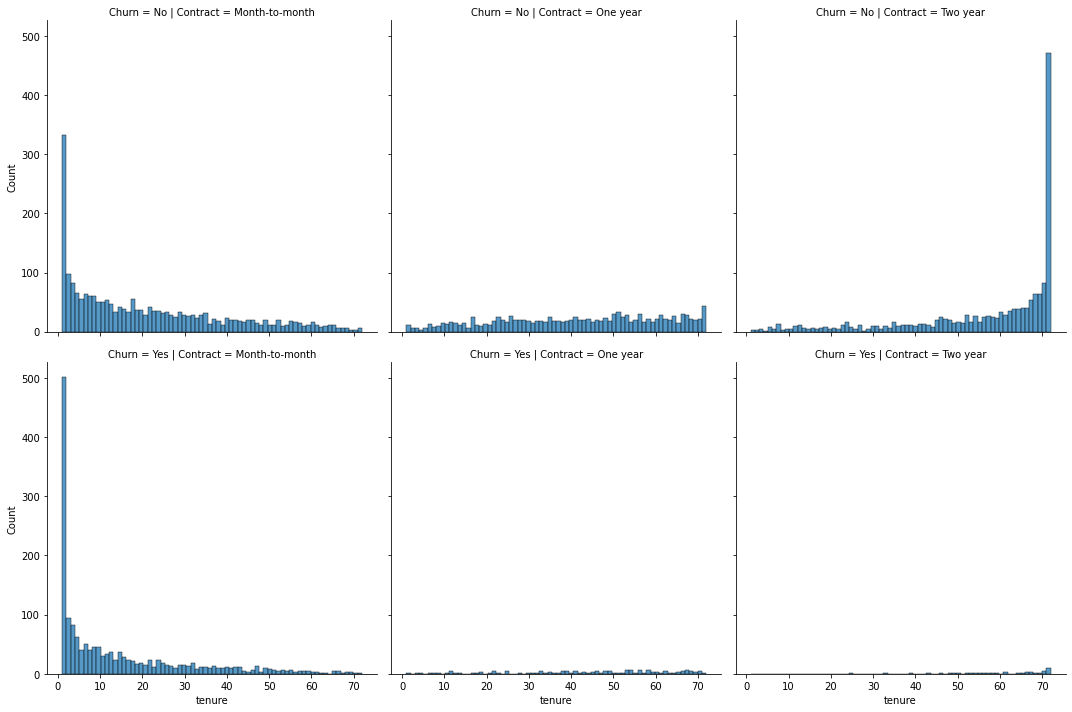

In [479]:
# Histograms
plt.figure(figsize = (12, 4), dpi = 200)
sns.displot(data = df, x = 'tenure', bins = 70, row = 'Churn', col = 'Contract')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

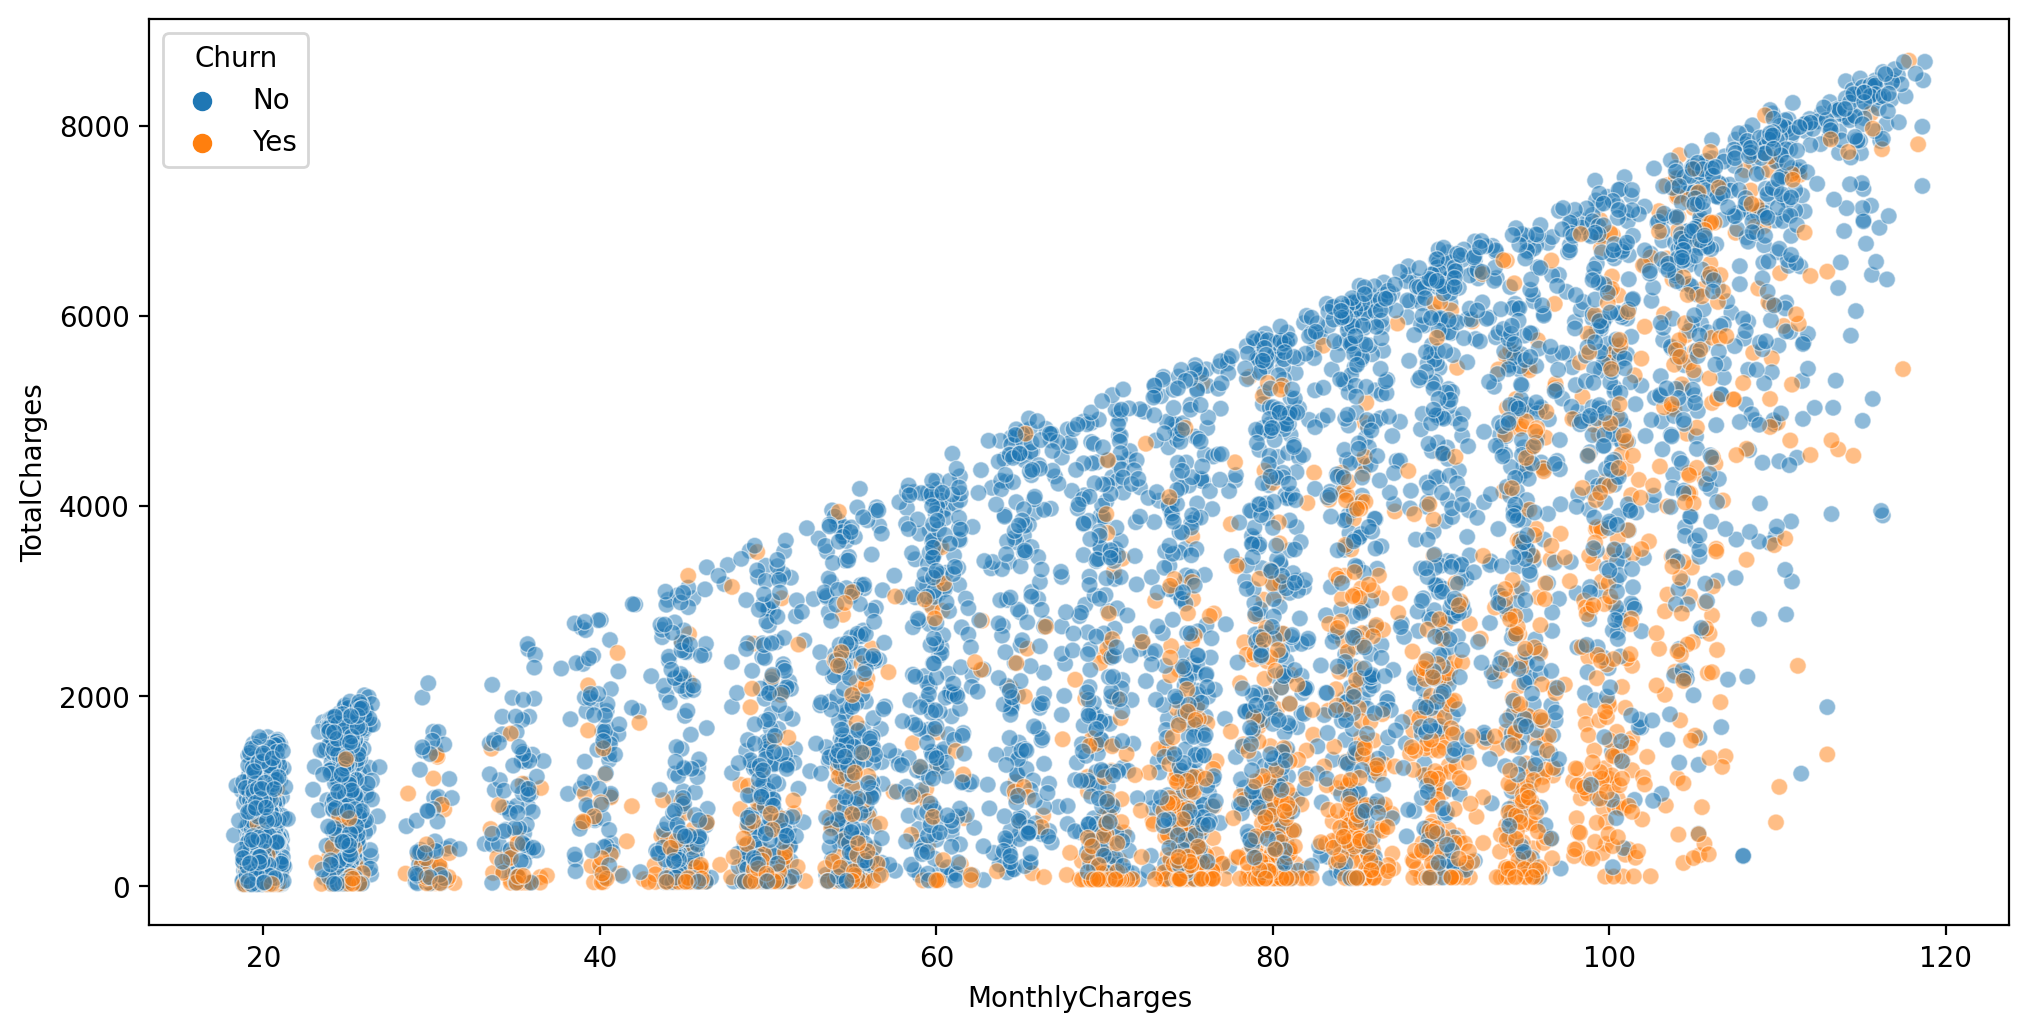

In [480]:
# scatter plot of Total Charges versus Monthly Charges, hue by Churn
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', alpha = 0.5)

In [ ]:
# Creating Cohorts based on Tenure
# calculate the Churn rate (percentage that had Yes Churn) per cohort

In [481]:
# 1
tenure = []
for i in range(df['tenure'].min(), df['tenure'].max() + 1):
    tdf = df[df['tenure'] == i]
    yes = tdf[tdf['Churn'] == 'Yes']
    perc = round(yes.shape[0] / tdf.shape[0] * 100, 6)
    tenure.append(perc)
tenure[:10]

[61.990212,
 51.680672,
 47.0,
 47.159091,
 48.120301,
 36.363636,
 38.931298,
 34.146341,
 38.655462,
 38.793103]

In [482]:
# 2
df2 = df.groupby(['Churn', 'tenure']).count().transpose()
df2

Churn              No                                        ... Yes        \
tenure             1    2    3   4   5   6   7   8   9   10  ...  63 64 65   
customerID        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
gender            233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Partner           233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Dependents        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
InternetService   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Contract          233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
customerID        13  10  9  8  11  6  6  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[19 rows x 144 columns]

In [483]:
churn_rate_df = df2['Yes'] / (df2['Yes'] + df2['No']) * 100
churn_rate = churn_rate_df.transpose()['customerID']
churn_rate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

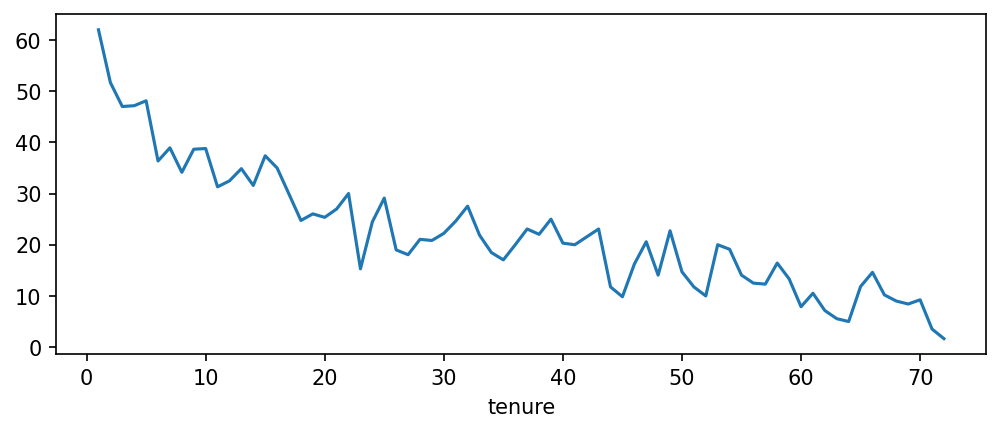

In [484]:
# plot showing churn rate per months of tenure
plt.figure(figsize = (8,3), dpi = 150)
churn_rate.plot()

In [ ]:
# Broader Cohort Groups (creating a new column called Tenure Cohort that creates 4 separate categories)

In [485]:
def ten(tenure):
    if tenure <= 12:
        return '0-12 Months'
    if tenure <= 24:
        return '12-24 Months'
    if tenure <= 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [486]:
df['Tenure Cohort'] = df['tenure'].apply(ten)

In [487]:
df[['tenure', 'Tenure Cohort']].head(10)

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

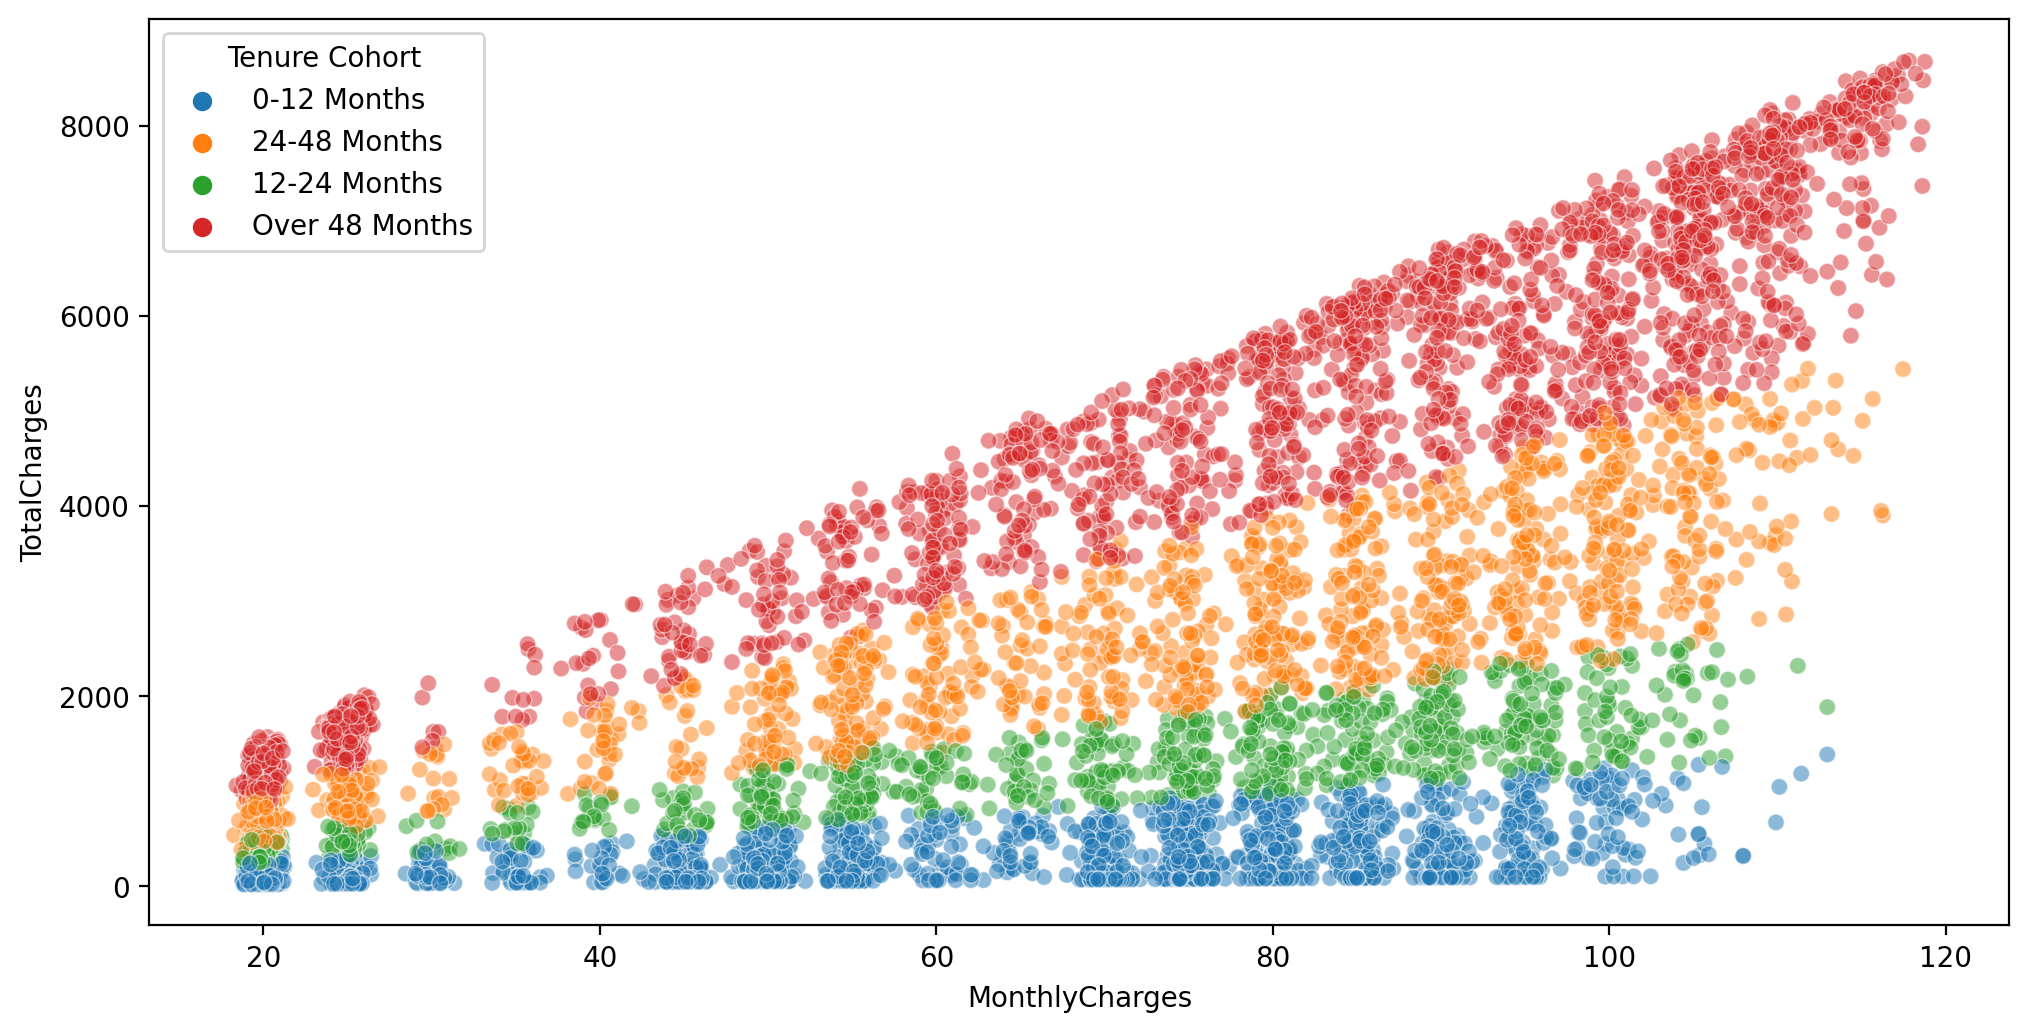

In [488]:
# Total Charges versus Monthly Charts (colored by Tenure Cohort)
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Tenure Cohort', alpha = 0.5)

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

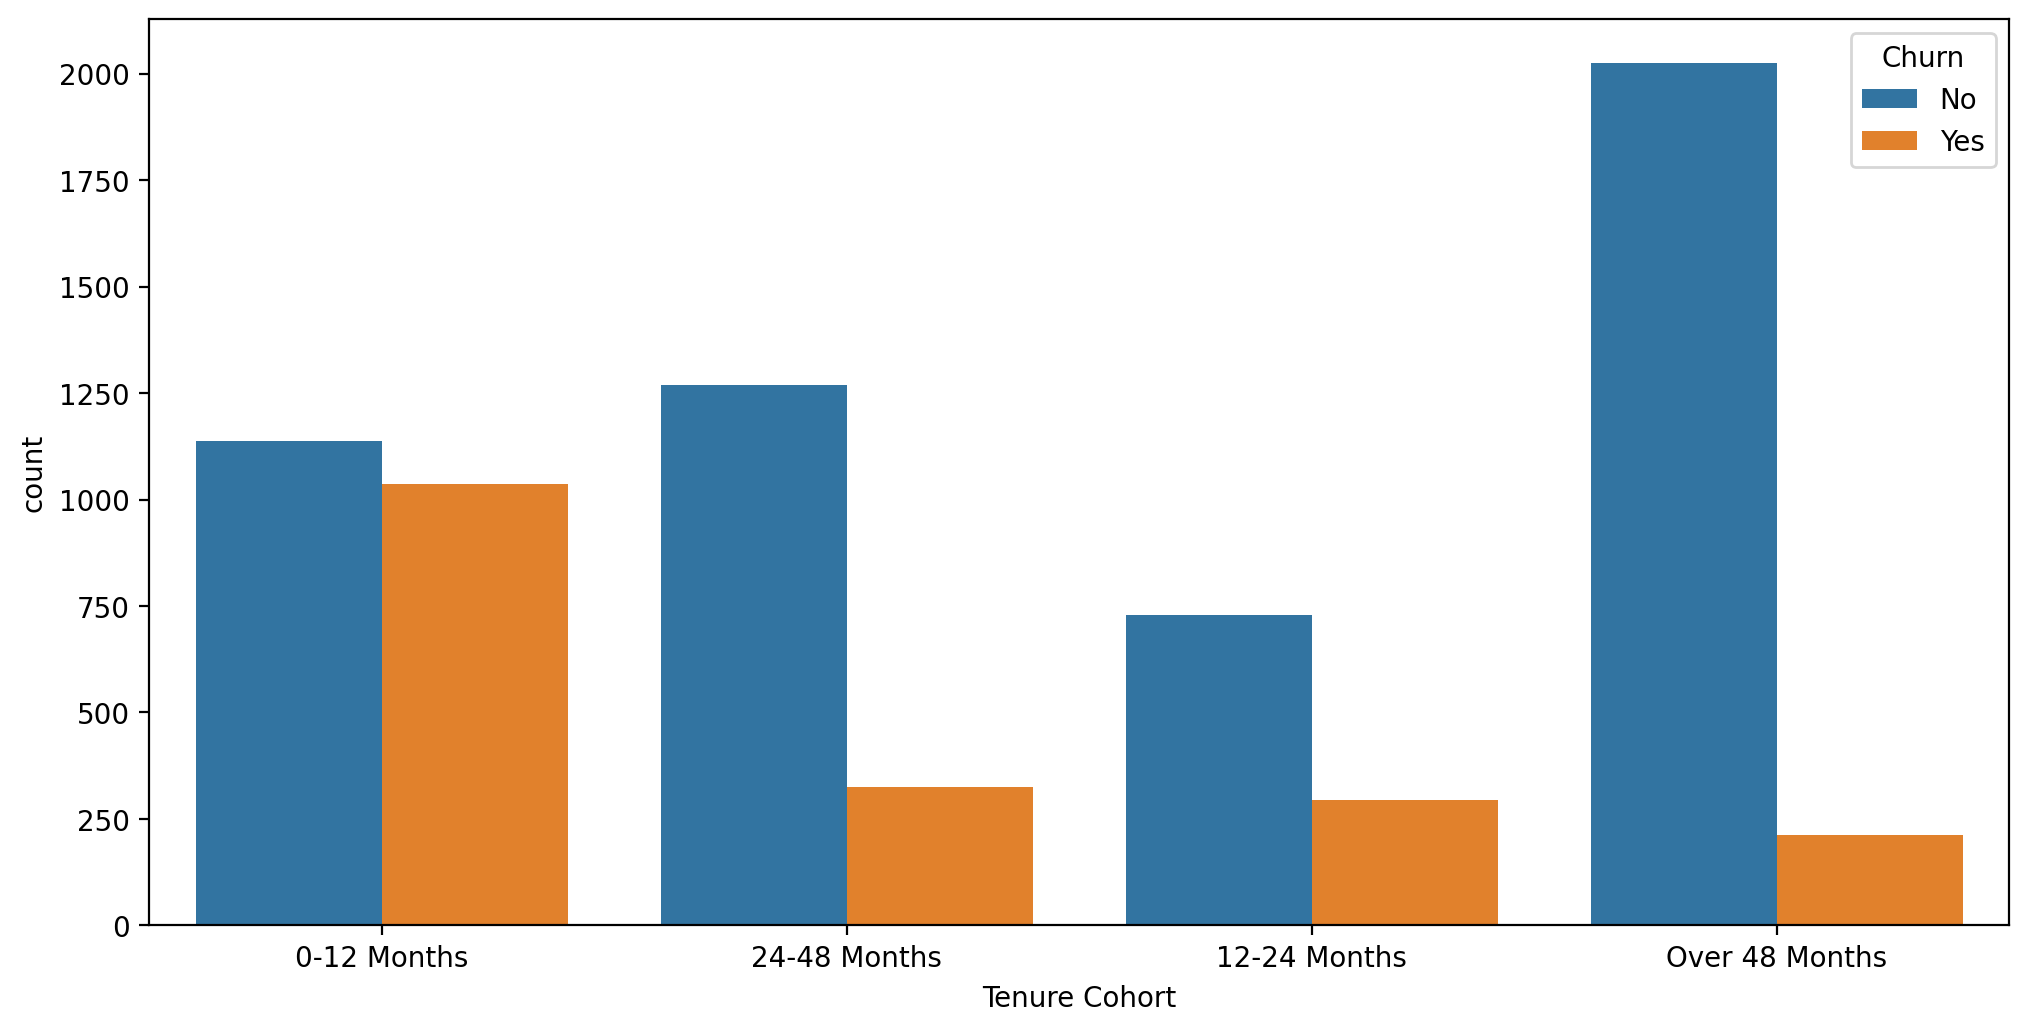

In [489]:
# count plot showing the churn count per cohort.
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(data = df, x = 'Tenure Cohort', hue = 'Churn')

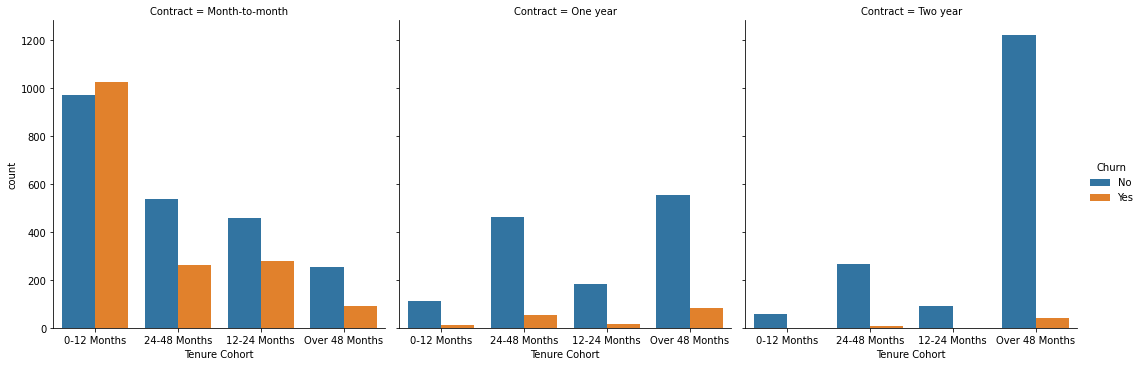

In [490]:
# grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue
sns.catplot(data = df, x = 'Tenure Cohort', kind = 'count', hue = 'Churn', col = 'Contract')

In [ ]:
# Predictive Modeling
# 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.

# 1) Single Decision Tree :

In [491]:
# Separating out the data into X features and Y label
X = df.drop(labels = ['Churn', 'customerID'], axis = 1)
X = pd.get_dummies(data = X, drop_first = True)
X

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0       1           29.85         29.85            0   
1                 0      34           56.95       1889.50            1   
2                 0       2           53.85        108.15            1   
3                 0      45           42.30       1840.75            1   
4                 0       2           70.70        151.65            0   
...             ...     ...             ...           ...          ...   
7027              0      24           84.80       1990.50            1   
7028              0      72          103.20       7362.90            0   
7029              0      11           29.60        346.45            0   
7030              1       4           74.40        306.60            1   
7031              0      66          105.65       6844.50            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1               0               0                 1   
2               0               0                 1   
3               0               0                 0   
4               0               0                 1   
...           ...             ...               ...   
7027            1               1                 1   
7028            1               1                 1   
7029            1               1                 0   
7030            1               0                 1   
7031            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                                  1                  0  ...   
1                                  0                  0  ...   
2                                  0                  0  ...   
3                                  1                  0  ...   
4                                  0                  0  ...   
...                              ...                ...  ...   
7027                               0                  1  ...   
7028                               0                  1  ...   
7029                               1                  0  ...   
7030                               0                  1  ...   
7031                               0                  0  ...   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                       0                  0                  0   
1                       0                  1                  0   
2                       0                  0                  0   
3                       0                  1                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
7027                    1                  1                  0   
7028                    1                  1                  0   
7029                    0                  0                  0   
7030                    0                  0                  0   
7031                    1                  0                  1   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                        1                                      0   
1                        0                                      0   
2                        1                                      0   
3                        0                                      0   
4                        1                                      0   
...                    ...                                    ...   
7027                     1                                      0   
7028                     1                                      1   
7029                     1                                      0   
7030                     1                                      0   
7031                     1                                      0   

      PaymentMethod_Electronic check  PaymentMethod_M

In [492]:
y = df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [ ]:
# Perform a train test split

In [493]:
from sklearn.model_selection import train_test_split

In [494]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [495]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, f1_score, precision_score

In [496]:
f1 = []

df_test = pd.DataFrame(data = y_test)
y_test_list = list(df_test['Churn'].map({'Yes':1, 'No':0}))

for i in range(1, 100):
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc.fit(X_train, y_train)
    
    y_pred = dtc.predict(X_test)
    df_pred = pd.DataFrame(data = y_pred)
    y_pred_list = list(df_pred[0].map({'Yes':1, 'No':0}))
    
    f1.append(f1_score(y_test_list, y_pred_list))

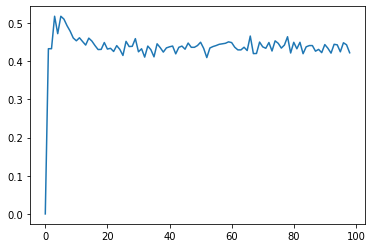

In [497]:
plt.plot(f1)

In [498]:
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [499]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



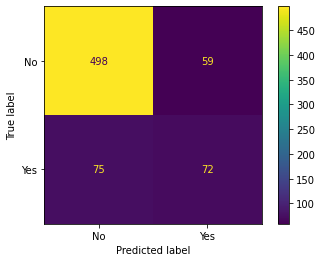

In [500]:
plot_confusion_matrix(dtc, X_test, y_test)

In [501]:
dtc.feature_importances_

array([0.01082504, 0.42391407, 0.04534099, 0.06494213, 0.00123697,
       0.        , 0.        , 0.00785158, 0.        , 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.02628952, 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [502]:
df_imp = pd.Series(index = X.columns, data = dtc.feature_importances_)
df_imp_sorted = df_imp.sort_values()
df_imp_sorted

DeviceProtection_No internet service     0.000000
Tenure Cohort_12-24 Months               0.000000
PaymentMethod_Mailed check               0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaperlessBilling_Yes                     0.000000
StreamingMovies_Yes                      0.000000
StreamingMovies_No internet service      0.000000
StreamingTV_Yes                          0.000000
TechSupport_No internet service          0.000000
DeviceProtection_Yes                     0.000000
Tenure Cohort_24-48 Months               0.000000
OnlineBackup_No internet service         0.000000
Tenure Cohort_Over 48 Months             0.000000
Dependents_Yes                           0.000000
InternetService_No                       0.000000
Partner_Yes                              0.000000
MultipleLines_No phone service           0.000000
OnlineSecurity_No internet service       0.000000
gender_Male                              0.001237
OnlineBackup_Yes                         0.005341


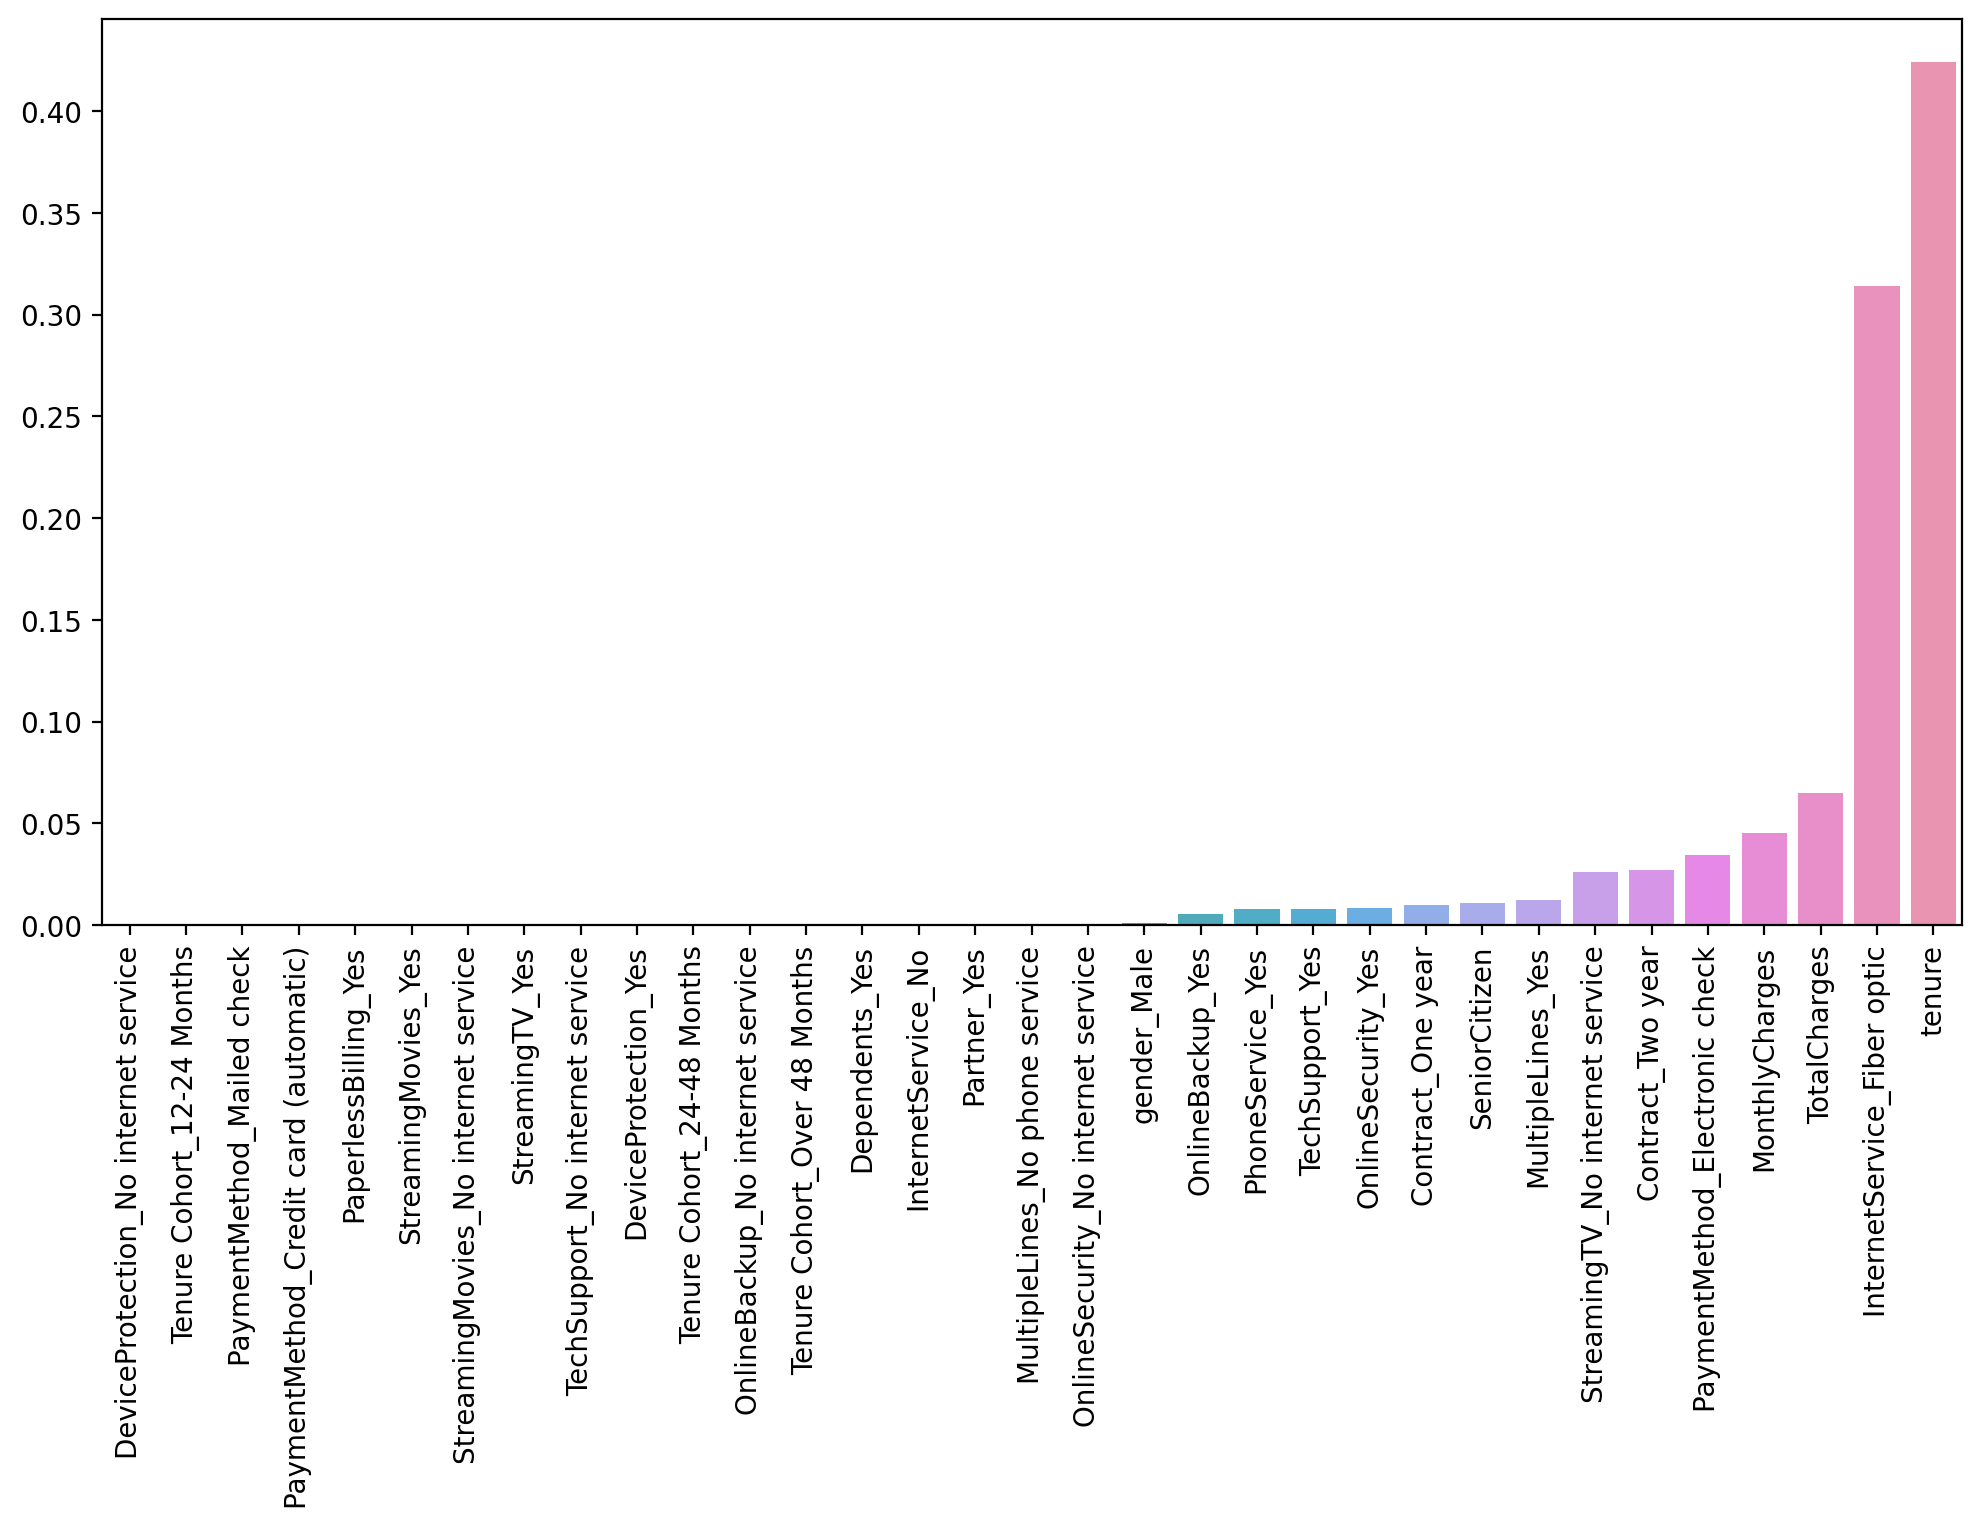

In [503]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = df_imp_sorted.index, y = df_imp_sorted.values)
plt.xticks(rotation = 90);

In [504]:
from sklearn.tree import plot_tree

In [505]:
plt.figure(figsize = (50, 10), dpi = 500)
plot_tree(dtc, feature_names=X.columns);

In [ ]:
# 2) Random Forest

In [506]:
from sklearn.ensemble import RandomForestClassifier

In [507]:
rfc = RandomForestClassifier()

In [508]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [509]:
y_pred = rfc.predict(X_test)

In [510]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.53      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.79      0.80      0.80       704



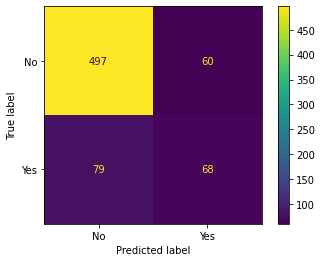

In [511]:
plot_confusion_matrix(rfc, X_test, y_test)

In [ ]:
# Boosted Trees
# 3) AdaBoost

In [512]:
from sklearn.ensemble import AdaBoostClassifier

In [513]:
abc = AdaBoostClassifier()

In [514]:
abc.fit(X_train, y_train)

AdaBoostClassifier()

In [515]:
y_pred = abc.predict(X_test)

In [516]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



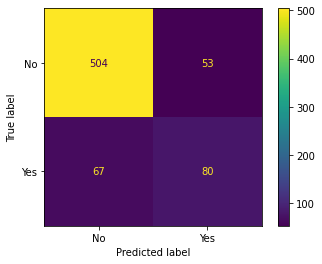

In [517]:
plot_confusion_matrix(abc, X_test, y_test)

In [ ]:
# Gradient Boosting

In [518]:
from sklearn.ensemble import GradientBoostingClassifier

In [519]:
gbc = GradientBoostingClassifier()

In [520]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [521]:
y_pred = gbc.predict(X_test)

In [522]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



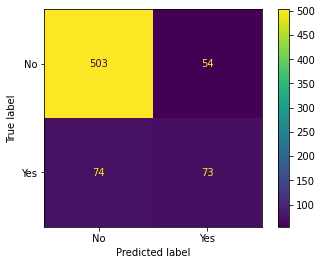

In [523]:
plot_confusion_matrix(gbc, X_test, y_test)

In [524]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.